In [16]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [17]:
from pathlib import Path
from get_train_test_1 import split_train_test
import numpy as np
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import cv2

# Creation of the data

In [18]:
# change the data path here
data_HR_path= Path('data_corn_160') 
images_path=str(data_HR_path/'data'/'images')

#Names to the files
train_val_file='train_val_160'
test_file='test_160'
percent_test=0.10 #10%

split_train_test(original_dataset_dir= images_path, 
                 base_dir = str(data_HR_path),
                 test_split = percent_test, 
                 train_file=train_val_file,
                 test_file=test_file)

27474 24727 2747
data_corn_160/train_val_160/images
data_corn_160/test_160/images


# Plot  images + mask

In [19]:
def mask_overlay(image, mask, color=(15, 15, 0)):
    """
    Helper function to visualize mask over the img
    """
    print(mask.shape)      
    mask = np.dstack((mask, mask, mask)) * np.array(color)
    mask = mask.astype(np.float32)
    weighted_sum = cv2.addWeighted(mask, 0.3, image, 0.7, 0.)
    img = image.copy()
    ind = mask[:, :, 0] > 0  
    img[ind] = weighted_sum[ind]

    return img

def plot_img_mask(img_path):
    img = np.load(str(img_path))

    print(np.shape(img),np.min(img),np.max(img))

    img2 = (img[:,:,:3].astype(np.float32))/np.max(img)
    #inp = (img*255).astype(np.uint8)
    mask = np.load(str(img_path).replace('images', 'masks'))#.replace(r'.npy', r'_a.npy'), 0)
    
    #mask=mask.reshape(mask.shape[1],-1)
    mask =np .max(mask, axis=2)  #convert of 3 channel to 1 channel
    mask=(mask > 0).astype(np.uint8)
    #mask=(mask > 0).astype(np.float32)

    fig = plt.figure(figsize=(30, 30))  
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    ax1=plt.subplot(131)
    ax1.imshow(img2)
    ax2=plt.subplot(132)
    ax2.imshow(mask)

    ax3=plt.subplot(133)
    ax3.imshow(mask_overlay(img2, mask))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(160, 160, 5) 6726 52276
(160, 160)


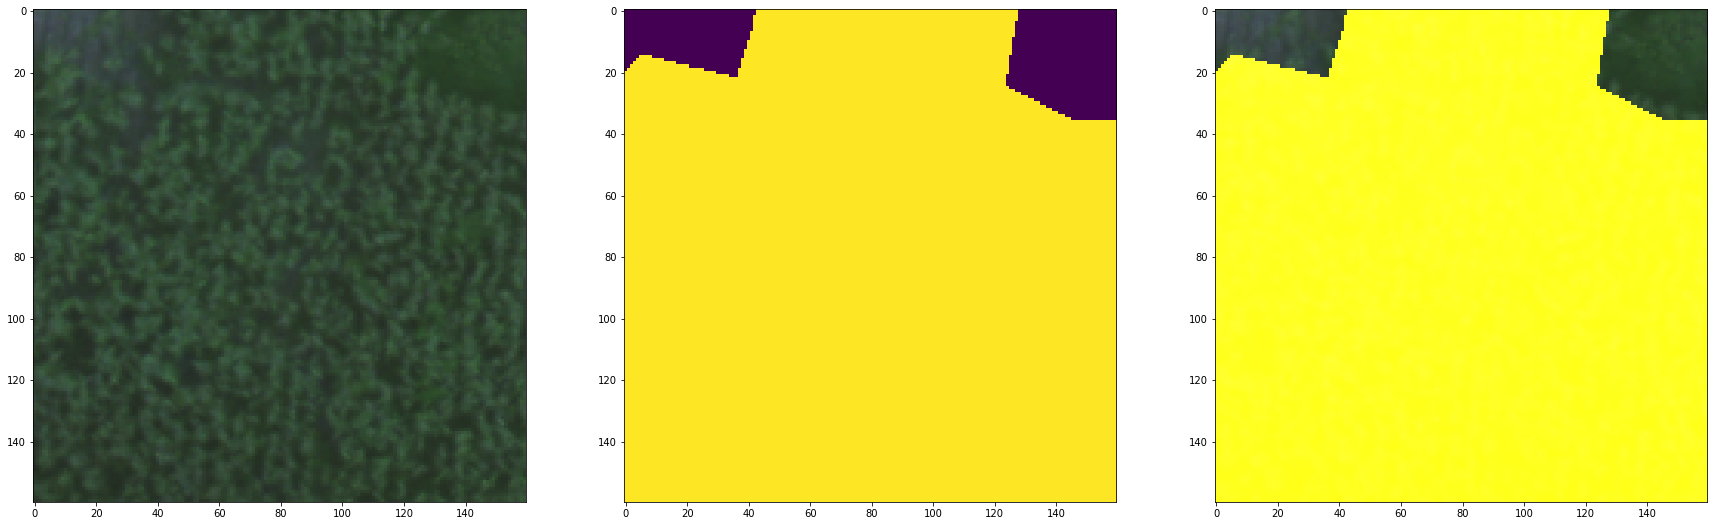

In [20]:
img_path ="data_corn_160/train_val_160/images/H7_10690.npy"
plot_img_mask(img_path)


## Find some parameters of the data: max,std

In [21]:
import glob  ###
import os
from get_train_test_kfold import get_split_out, percent_split, get_split_in
from scalarmeanstd import meanstd

data_path= Path('data_corn_160') 
train_val_file='train_val_160'
test_file='test_160'
input_channels=6
train_val_file_names=np.array(sorted(glob.glob(str(data_path/train_val_file/'images')+ "/*.npy")))
test_file_names =  np.array(sorted(glob.glob(str(data_path/test_file/'images') + "/*.npy")))
    
train_file_names,val_file_names = get_split_in(train_val_file_names,0)
max_values, mean_values, std_values=meanstd(train_file_names, val_file_names,test_file_names,str(data_path),input_channels) #_60 
print(max_values, mean_values, std_values)


ValueError: operands could not be broadcast together with shapes (6,) (5,) (6,) 

## Predictions unlabel images

117


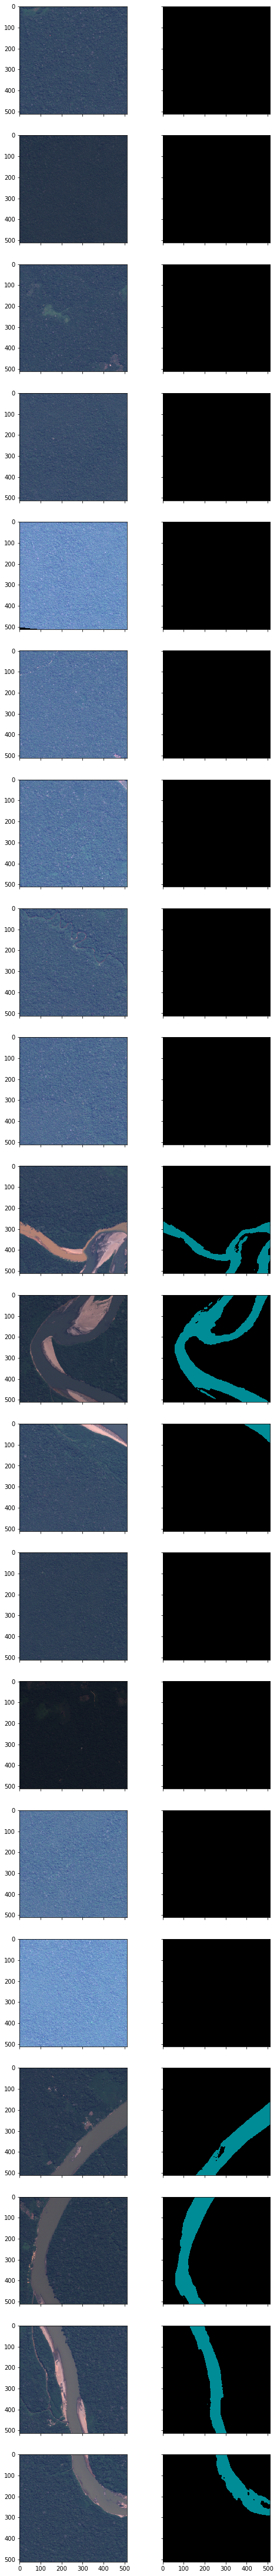

In [18]:
##
from unlabeled_plotting import plot_prediction
path_model_VHR='logs_VHR/mapping/model_40epoch_100_percent_UNet11_fold0.pth'
file_unlabel='images_jungle'
plot_prediction(path_model=path_model_VHR,unlabel_name_file=file_unlabel)